In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train =  pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
df_test =  pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

In [4]:
df_train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
df_train.shape

(750000, 18)

In [6]:
df_test.shape

(250000, 17)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [8]:
len(df_train['id'].unique())

750000

In [9]:
df_train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


In [11]:
df_train = df_train.drop(columns=['id'],axis=1)
df_test = df_test.drop(columns=['id'],axis=1)

In [12]:
df_train.shape

(750000, 17)

In [13]:
df_test.shape

(250000, 16)

In [14]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


# EDA (Exploratory Data Analysis)

In [15]:
for col in df_train.columns:
    unique_count = df_train[col].nunique()
    print(f"{col}: {unique_count} unique values")

age: 78 unique values
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
balance: 8217 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
day: 31 unique values
month: 12 unique values
duration: 1760 unique values
campaign: 52 unique values
pdays: 596 unique values
previous: 50 unique values
poutcome: 4 unique values
y: 2 unique values


In [16]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day']
num_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [17]:
print("Categorical Columns:")
for col in cat_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

print("\nNumerical Columns:")
for col in num_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

Categorical Columns:
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
day: 31 unique values

Numerical Columns:
age: 78 unique values
balance: 8217 unique values
duration: 1760 unique values
campaign: 52 unique values
pdays: 596 unique values
previous: 50 unique values


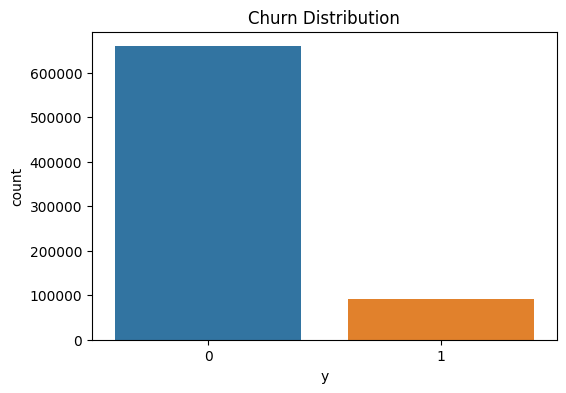

y
0    87.934933
1    12.065067
Name: proportion, dtype: float64


In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df_train)
plt.title('Churn Distribution')
plt.show()

print(df_train['y'].value_counts(normalize=True) * 100)

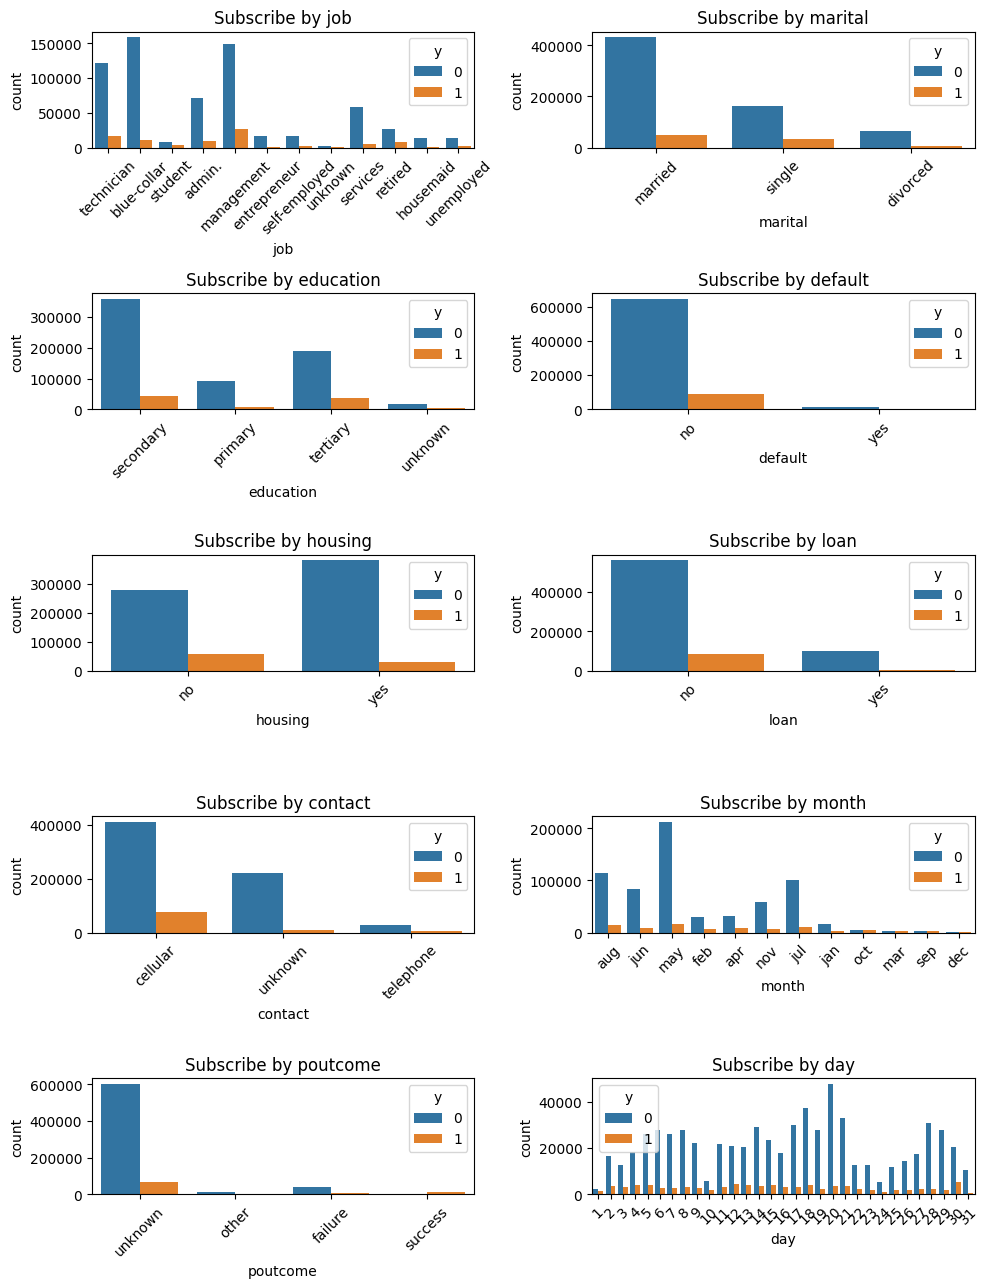

In [19]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(cat_columns, 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=col, hue='y', data=df_train)
    plt.title(f'Subscribe by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

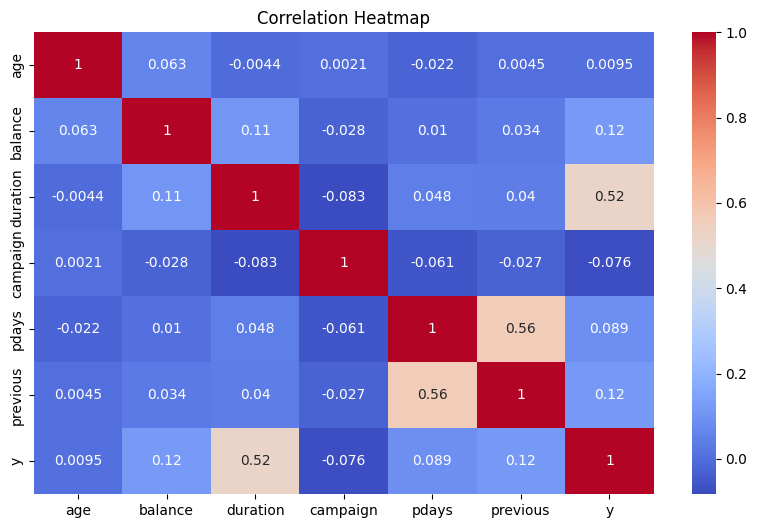

In [20]:
#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[num_columns + ['y']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
encoders = {}

def object_to_int_train(series, col_name):
    if series.dtype == 'object':
        le = LabelEncoder()
        transformed = le.fit_transform(series)
        encoders[col_name] = le  # store the encoder
        return transformed
    return series


In [23]:
df_train = df_train.apply(lambda col: object_to_int_train(col, col.name))
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1


In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   age        750000 non-null  int64
 1   job        750000 non-null  int64
 2   marital    750000 non-null  int64
 3   education  750000 non-null  int64
 4   default    750000 non-null  int64
 5   balance    750000 non-null  int64
 6   housing    750000 non-null  int64
 7   loan       750000 non-null  int64
 8   contact    750000 non-null  int64
 9   day        750000 non-null  int64
 10  month      750000 non-null  int64
 11  duration   750000 non-null  int64
 12  campaign   750000 non-null  int64
 13  pdays      750000 non-null  int64
 14  previous   750000 non-null  int64
 15  poutcome   750000 non-null  int64
 16  y          750000 non-null  int64
dtypes: int64(17)
memory usage: 97.3 MB


In [25]:
print("Categorical Columns:")
for col in cat_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

print("\nNumerical Columns:")
for col in num_columns:
    print(f"{col}: {df_train[col].nunique()} unique values")

Categorical Columns:
job: 12 unique values
marital: 3 unique values
education: 4 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
day: 31 unique values

Numerical Columns:
age: 78 unique values
balance: 8217 unique values
duration: 1760 unique values
campaign: 52 unique values
pdays: 596 unique values
previous: 50 unique values



# One-hot Encoding

In [26]:
oh_cat_cols=[]            # columns that shoud be One-hot encoded
for col in cat_columns:
    if len(df_train[col].unique())>2 :
        oh_cat_cols.append(col)

oh_cat_cols  

['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day']

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded_data = encoder.fit_transform(df_train[oh_cat_cols])

encoded_df_train = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(oh_cat_cols)  
)
df_train_encoded = pd.concat([df_train.drop(oh_cat_cols, axis=1), encoded_df_train], axis=1)

In [28]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,7,2,1,0,1282,0,1,2,4,5,1006,2,-1,0,3,1
749996,69,5,0,2,0,631,0,0,0,19,1,87,1,-1,0,3,0
749997,50,1,1,1,0,217,1,0,0,17,0,113,1,-1,0,3,0
749998,32,9,1,1,0,-274,0,0,0,26,1,108,6,-1,0,3,0


In [29]:
df_train_encoded

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,42,0,7,0,0,117,3,-1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,0,514,0,0,185,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0,602,1,0,111,2,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,0,34,1,0,10,2,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,26,0,889,1,0,902,1,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,0,1282,0,1,1006,2,-1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749996,69,0,631,0,0,87,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749997,50,0,217,1,0,113,1,-1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749998,32,0,-274,0,0,108,6,-1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Train-Val Split


In [66]:
from sklearn.model_selection import train_test_split

X = df_train_encoded.drop('y', axis=1)
y = df_train_encoded['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [67]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (675000, 71)
X_val shape: (75000, 71)
y_train shape: (675000,)
y_val shape: (75000,)


# Standardizing numeric attributes

In [68]:
num_columns

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [69]:
X_train[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,675000.000000,675000.000000,675000.000000,675000.000000,675000.000000,675000.000000
mean,40.925156,1202.826720,256.214714,2.577388,22.363831,0.297630
std,10.098439,2819.625399,272.331670,2.719613,77.247483,1.310604
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,634.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,361.000000,3.000000,-1.000000,0.000000
max,95.000000,99717.000000,4918.000000,63.000000,871.000000,58.000000


In [70]:
X_val[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,40.937547,1215.233493,256.359013,2.573587,22.852853,0.306787
std,10.102398,2980.241667,274.565163,2.708611,77.968736,1.545249
min,18.000000,-8019.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,635.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,361.000000,3.000000,-1.000000,0.000000
max,93.000000,98417.000000,4916.000000,51.000000,826.000000,200.000000


In [71]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

X_val[num_columns] = scaler.transform(X_val[num_columns])

In [72]:
X_train[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,6.750000e+05,6.750000e+05,6.750000e+05,6.750000e+05,6.750000e+05,6.750000e+05
mean,1.852674e-18,-1.263187e-17,-7.259115e-17,2.635850e-17,2.602165e-17,-1.153711e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.270170e+00,-3.270588e+00,-9.371474e-01,-5.800050e-01,-3.024545e-01,-2.270937e-01
25%,-7.847907e-01,-4.265913e-01,-6.066677e-01,-5.800050e-01,-3.024545e-01,-2.270937e-01
50%,-1.906391e-01,-2.017386e-01,-4.524439e-01,-2.123054e-01,-3.024545e-01,-2.270937e-01
75%,7.005884e-01,6.638237e-02,3.847711e-01,1.553942e-01,-3.024545e-01,-2.270937e-01
max,5.354777e+00,3.493877e+01,1.711806e+01,2.221737e+01,1.098595e+01,4.402734e+01


In [73]:
X_val[num_columns].describe()

,age,balance,duration,campaign,pdays,previous
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,0.001227,0.004400,0.000530,-0.001398,0.006331,0.006987
std,1.000393,1.056964,1.008202,0.995955,1.009338,1.179036
min,-2.270170,-3.270588,-0.926131,-0.580005,-0.302454,-0.227094
25%,-0.784791,-0.426591,-0.606668,-0.580005,-0.302454,-0.227094
50%,-0.190639,-0.201384,-0.452444,-0.212305,-0.302454,-0.227094
75%,0.700588,0.066382,0.384771,0.155394,-0.302454,-0.227094
max,5.156726,34.477717,17.110712,17.804974,10.403404,152.374415


# Model Building & Traning

Logistic Regression Accuracy: 0.9165266666666667
Logistic Regression ROC AUC: 0.9439080256021259
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95    131902
           1       0.71      0.52      0.60     18098

    accuracy                           0.92    150000
   macro avg       0.82      0.74      0.78    150000
weighted avg       0.91      0.92      0.91    150000



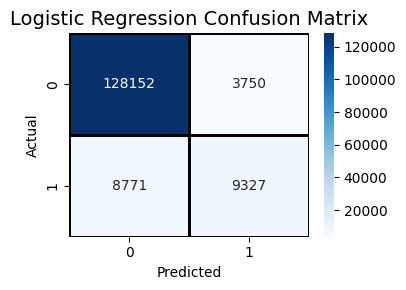




Decision Tree Accuracy: 0.9066466666666667
Decision Tree ROC AUC: 0.7823267248718841
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    131902
           1       0.61      0.62      0.62     18098

    accuracy                           0.91    150000
   macro avg       0.78      0.78      0.78    150000
weighted avg       0.91      0.91      0.91    150000



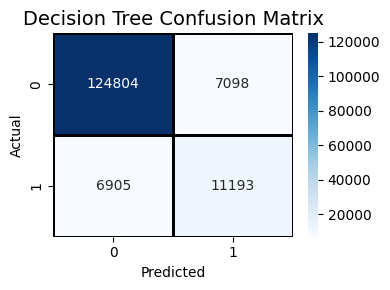




KNN Accuracy: 0.9178066666666667
KNN ROC AUC: 0.9273658198576952
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95    131902
           1       0.71      0.54      0.61     18098

    accuracy                           0.92    150000
   macro avg       0.82      0.75      0.78    150000
weighted avg       0.91      0.92      0.91    150000



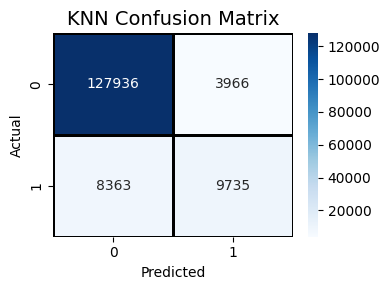




Random Forest Accuracy: 0.9307
Random Forest ROC AUC: 0.9605218249257308
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    131902
           1       0.75      0.63      0.69     18098

    accuracy                           0.93    150000
   macro avg       0.85      0.80      0.82    150000
weighted avg       0.93      0.93      0.93    150000



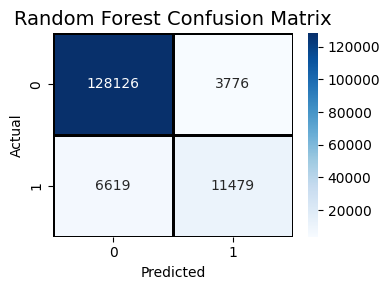

XGBoost Accuracy: 0.9328733333333333
XGBoost ROC AUC: 0.9654063851548708
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    131902
           1       0.76      0.65      0.70     18098

    accuracy                           0.93    150000
   macro avg       0.85      0.81      0.83    150000
weighted avg       0.93      0.93      0.93    150000



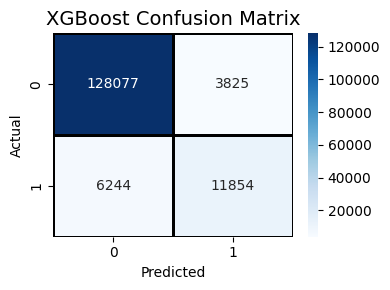

In [38]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier

# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# def plot_conf_matrix(y_true, y_pred, title):
#     plt.figure(figsize=(4, 3))
#     sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", 
#                 cmap='Blues', linecolor="k", linewidths=2)
#     plt.title(f"{title} Confusion Matrix", fontsize=14)
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.tight_layout()
#     plt.show()

# # Logistic Regression
# lr_model = LogisticRegression(max_iter=1000)
# lr_model.fit(X_train, y_train)
# lr_pred = lr_model.predict(X_val)
# lr_proba = lr_model.predict_proba(X_val)[:, 1]
# print("Logistic Regression Accuracy:", lr_model.score(X_val, y_val))
# print("Logistic Regression ROC AUC:", roc_auc_score(y_val, lr_proba))
# print("Logistic Regression Classification Report:\n", classification_report(y_val, lr_pred))
# plot_conf_matrix(y_val, lr_pred, "Logistic Regression")
# print(2*("\n" + "="*60 + "\n"))

# # Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)
# dt_model.fit(X_train, y_train)
# dt_pred = dt_model.predict(X_val)
# dt_proba = dt_model.predict_proba(X_val)[:, 1]
# print("Decision Tree Accuracy:", dt_model.score(X_val, y_val))
# print("Decision Tree ROC AUC:", roc_auc_score(y_val, dt_proba))
# print("Decision Tree Classification Report:\n", classification_report(y_val, dt_pred))
# plot_conf_matrix(y_val, dt_pred, "Decision Tree")
# print(2*("\n" + "="*60 + "\n"))

# # KNN
# knn_model = KNeighborsClassifier(n_neighbors=11)
# knn_model.fit(X_train, y_train)
# knn_pred = knn_model.predict(X_val)
# knn_proba = knn_model.predict_proba(X_val)[:, 1]
# print("KNN Accuracy:", knn_model.score(X_val, y_val))
# print("KNN ROC AUC:", roc_auc_score(y_val, knn_proba))
# print("KNN Classification Report:\n", classification_report(y_val, knn_pred))
# plot_conf_matrix(y_val, knn_pred, "KNN")
# print(2*("\n" + "="*60 + "\n"))

# SVM 
# svc_model = SVC(probability=True, random_state=1)
# svc_model.fit(X_train, y_train)
# svc_pred = svc_model.predict(X_val)
# svc_proba = svc_model.predict_proba(X_val)[:, 1]
# print("SVM Accuracy:", svc_model.score(X_val, y_val))
# print("SVM ROC AUC:", roc_auc_score(y_val, svc_proba))
# print("SVM Classification Report:\n", classification_report(y_val, svc_pred))
# plot_conf_matrix(y_val, svc_pred, "SVM")
# print(2*("\n" + "="*60 + "\n"))

# # Random Forest
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_val)
# rf_proba = rf_model.predict_proba(X_val)[:, 1]
# print("Random Forest Accuracy:", rf_model.score(X_val, y_val))
# print("Random Forest ROC AUC:", roc_auc_score(y_val, rf_proba))
# print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))
# plot_conf_matrix(y_val, rf_pred, "Random Forest")

# # XGBoost Classifier
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_val)
# xgb_proba = xgb_model.predict_proba(X_val)[:, 1]
# print("XGBoost Accuracy:", xgb_model.score(X_val, y_val))
# print("XGBoost ROC AUC:", roc_auc_score(y_val, xgb_proba))
# print("XGBoost Classification Report:\n", classification_report(y_val, xgb_pred))
# plot_conf_matrix(y_val, xgb_pred, "XGBoost")


# Selected Model : XGBoost

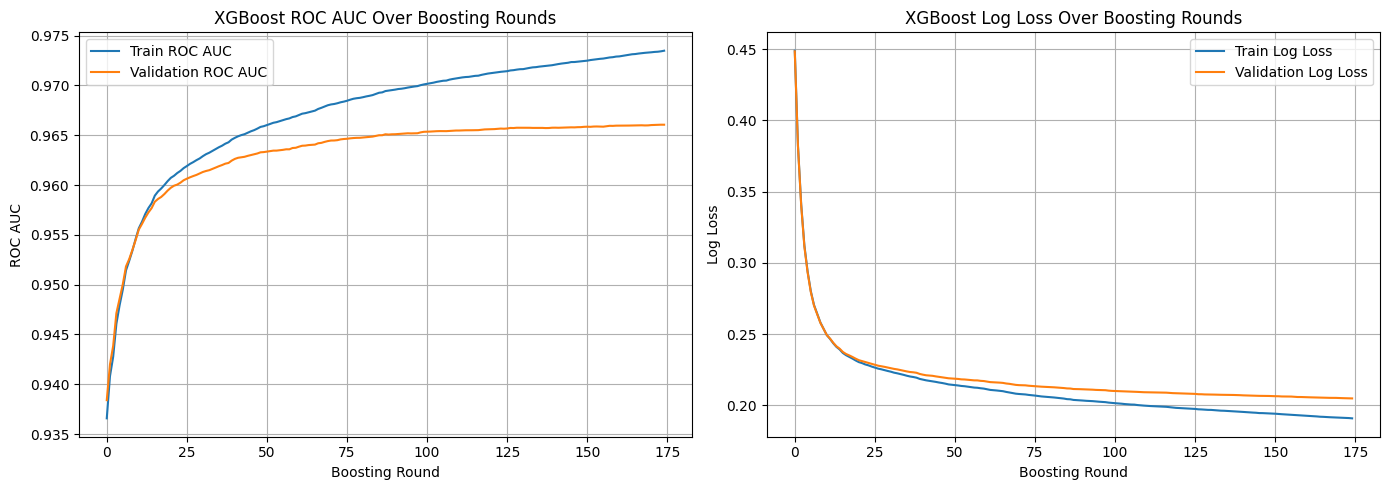

In [118]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric=['auc', 'logloss'], 
    random_state=42
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=False
)

results = xgb_model.evals_result()

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot ROC AUC
axs[0].plot(results['validation_0']['auc'], label='Train ROC AUC')
axs[0].plot(results['validation_1']['auc'], label='Validation ROC AUC')
axs[0].set_xlabel('Boosting Round')
axs[0].set_ylabel('ROC AUC')
axs[0].set_title('XGBoost ROC AUC Over Boosting Rounds')
axs[0].legend()
axs[0].grid(True)

# Plot Log Loss
axs[1].plot(results['validation_0']['logloss'], label='Train Log Loss')
axs[1].plot(results['validation_1']['logloss'], label='Validation Log Loss')
axs[1].set_xlabel('Boosting Round')
axs[1].set_ylabel('Log Loss')
axs[1].set_title('XGBoost Log Loss Over Boosting Rounds')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [119]:
xgb_pred = xgb_model.predict(X_val)
xgb_proba = xgb_model.predict_proba(X_val)[:, 1]
print("XGBoost Accuracy:", xgb_model.score(X_val, y_val))
print("XGBoost ROC AUC:", roc_auc_score(y_val, xgb_proba))
print("XGBoost Classification Report:\n", classification_report(y_val, xgb_pred))

XGBoost Accuracy: 0.90504
XGBoost ROC AUC: 0.9660535570869474
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.94     65951
           1       0.57      0.91      0.70      9049

    accuracy                           0.91     75000
   macro avg       0.78      0.91      0.82     75000
weighted avg       0.94      0.91      0.91     75000



# XGBoost hyperparameter tuning

In [120]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [150, 175, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.25, 0.5, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3],
}

xgb_model = XGBClassifier(
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric=['auc', 'logloss'],
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,             
    scoring='roc_auc',     
    cv=3,                  
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best AUC:", random_search.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best AUC: 0.9662986632824623


In [121]:
xgb_best_model = random_search.best_estimator_

In [122]:
xgb_pred = xgb_best_model.predict(X_val)
xgb_proba = xgb_best_model.predict_proba(X_val)[:, 1]
print("XGBoost Accuracy:", xgb_best_model.score(X_val, y_val))
print("XGBoost ROC AUC:", roc_auc_score(y_val, xgb_proba))
print("XGBoost Classification Report:\n", classification_report(y_val, xgb_pred))

XGBoost Accuracy: 0.93424
XGBoost ROC AUC: 0.9664436587413471
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     65951
           1       0.76      0.66      0.71      9049

    accuracy                           0.93     75000
   macro avg       0.86      0.82      0.84     75000
weighted avg       0.93      0.93      0.93     75000



# Final Model training (With best parameters)

In [141]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

X[num_columns] = scaler.fit_transform(X[num_columns])
X_train_final = X
y_train_final = y


In [142]:
X_train_final

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_1,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.106310,0,-0.422083,0,0,-0.510829,0.155597,-0.302803,-0.223475,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.289776,0,-0.243316,0,0,-0.261338,-0.580100,-0.302803,-0.223475,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.487819,0,-0.212287,1,0,-0.532843,-0.212251,-0.302803,-0.223475,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.379012,0,-0.412563,1,0,-0.903409,-0.212251,-0.302803,-0.223475,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.478033,0,-0.111092,1,0,2.369319,-0.580100,-0.302803,-0.223475,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,-1.180969,0,0.027479,0,1,2.750893,-0.212251,-0.302803,-0.223475,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749996,2.779889,0,-0.202062,0,0,-0.620898,-0.580100,-0.302803,-0.223475,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749997,0.898482,0,-0.348038,1,0,-0.525505,-0.580100,-0.302803,-0.223475,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749998,-0.883905,0,-0.521163,0,0,-0.543849,1.259142,-0.302803,-0.223475,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [143]:
y_train_final

0         0
1         0
2         0
3         0
4         1
         ..
749995    1
749996    0
749997    0
749998    0
749999    0
Name: y, Length: 750000, dtype: int64

In [145]:
best_params = {
    'subsample': 0.8,
    'reg_lambda': 1,
    'reg_alpha': 0.5,
    'n_estimators': 150,
    'min_child_weight': 3,
    'max_depth': 10,
    'learning_rate': 0.1,
    'gamma': 0.1,
    'colsample_bytree': 0.6
}

final_xgb_model = XGBClassifier(
    use_label_encoder=False,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    **best_params
)


final_xgb_model.fit(X_train_final, y_train_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Test Set

In [78]:
# Label Encoding

In [123]:
def object_to_int_test(series, col_name):
    if series.dtype == 'object' and col_name in encoders:
        le = encoders[col_name]
        return le.transform(series)
    return series

In [124]:
df_test = df_test.apply(lambda col: object_to_int_test(col, col.name))
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,1,1,1,0,1397,1,0,2,21,8,224,1,-1,0,3
1,44,4,1,2,0,23,1,0,0,3,0,586,2,-1,0,3
2,36,6,1,0,0,46,1,1,0,13,8,111,2,-1,0,3
3,58,1,1,1,0,-1380,1,1,2,29,8,125,1,-1,0,3
4,28,9,2,1,0,1950,1,0,0,22,5,181,1,-1,0,3


In [81]:
# One-hot Encoding

In [125]:
oh_cat_cols=[]            # columns that shoud be One-hot encoded
for col in cat_columns:
    if len(df_test[col].unique())>2 :
        oh_cat_cols.append(col)

oh_cat_cols  

['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day']

In [126]:
from sklearn.preprocessing import OneHotEncoder

encoded_data = encoder.transform(df_test[oh_cat_cols])

encoded_df_test = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(oh_cat_cols)  
)
df_test_encoded = pd.concat([df_test.drop(oh_cat_cols, axis=1), encoded_df_test], axis=1)

In [127]:
X_test = df_test_encoded
print("X_test shape:", X_test.shape)

X_test shape: (250000, 71)


In [128]:
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [129]:
X_test

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_1,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,-0.883816,0,0.068865,1,0,-0.118292,-0.580005,-0.302454,-0.227094,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.304487,0,-0.418434,1,0,1.210970,-0.212305,-0.302454,-0.227094,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.487715,0,-0.410277,1,1,-0.533228,-0.212305,-0.302454,-0.227094,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.690841,0,-0.916018,1,1,-0.481820,-0.580005,-0.302454,-0.227094,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.279917,0,0.264990,1,0,-0.276188,-0.580005,-0.302454,-0.227094,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.205462,0,-0.426591,1,0,-0.702140,-0.212305,-0.302454,-0.227094,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249996,-0.091614,0,-0.241460,1,0,1.009010,-0.580005,2.157174,0.535914,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249997,2.185968,0,-0.414888,0,0,-0.287204,-0.580005,0.901469,5.876967,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249998,0.898639,0,0.505803,1,0,-0.342284,-0.212305,-0.302454,-0.227094,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# XG Boost model

In [146]:
xgb_pred = final_xgb_model.predict(X_test)
xgb_proba = final_xgb_model.predict_proba(X_test)[:, 1]

In [147]:
xgb_pred

array([0, 0, 0, ..., 1, 0, 0])

In [148]:
xgb_proba

array([0.00193649, 0.13578084, 0.00154907, ..., 0.87416804, 0.00113483,
       0.08952162], dtype=float32)

In [149]:
df_submission =  pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
df_submission

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown


In [150]:
df_submission['y'] = xgb_proba
df_submission.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown,0.001936
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown,0.135781
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown,0.001549
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown,0.000079
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown,0.020609


In [151]:
df_submission = df_submission[['id','y']]
df_submission

,id,y
0,750000,0.001936
1,750001,0.135781
2,750002,0.001549
3,750003,0.000079
4,750004,0.020609
...,...,...
249995,999995,0.000175
249996,999996,0.175490
249997,999997,0.874168
249998,999998,0.001135


In [152]:
df_submission.to_csv('submission_4_xgb.csv', index=False)